<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/10_Transform_DomainSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Transform Domain System</h1>

# 1. Frequency Response



> Sinusoids are the <font color="blue">eigenfunctions</font> of LSI systems (<font color="orange">scaled</font>, not 'changed')

Knowing the <font color="orange">scaling</font> for every sinusoids with different frequency fully describes system behavior, its called <font color="red">frequency response</font>.
<br>
<font color="red">frequency response</font> describes how a system affects each pure frequency.


## Sinusoids as Eigenfunctions
Let proofing it.
<br>
$
x[n] \to \left[ h[n] \right] \to y[n]
$
<br>
<center>
$
y[n] = x[n] \circledast h[n] = \sum_{\forall m}^{} h[m] x[n-m]
$
</center>
<br>
in example input $x[n] = e^{j\omega_0 n}$, if x[n-m] then $x[n-m] = e^{j\omega_0 (n-m)}$
<br>
$
y[n] = \sum_{m}h[m] e^{j\omega_0(n-m)}
$
<br>
$
y[n] = \sum_{m} \color{orange} {h[m]e^{-j\omega_0(m)}} \color{green}{e^{j\omega_0(n)}}
$
<br>
<center>
$
y[n] = \color{orange}{H(e^{j\omega_0})} \cdot \color{green}{x[n]} = |H(e^{j\omega_0})| \cdot e^{j(\omega_0n+\theta(\omega_0))}
$
</center>


*   input sinusoid $x[n] = e^{j\omega_0 n}$ result output sinusoid $y[n] = |H(e^{j\omega_0})| \cdot e^{j(\omega_0n+\theta(\omega_0))}$ with same frequency $\omega_0$


> Output is sinusoid scaled by FT at $\omega_0$


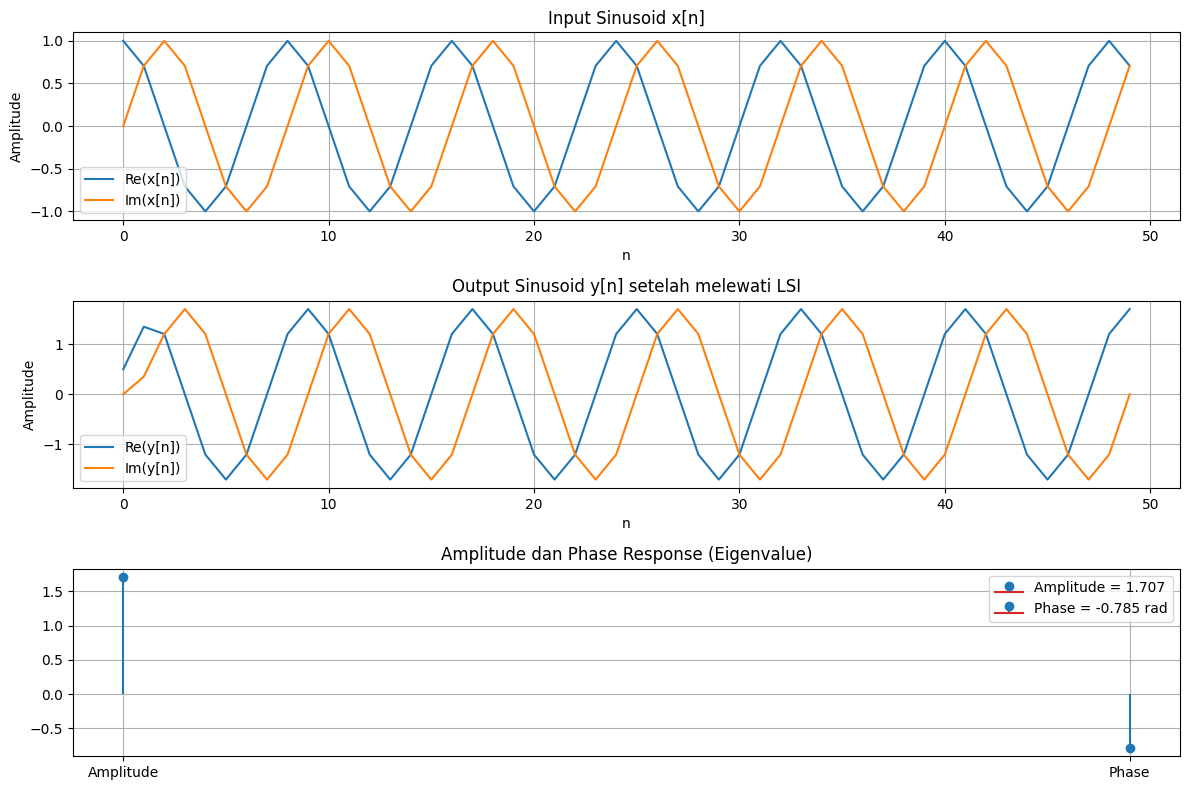

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# h[n] squence
h = np.array([0.5, 1.0, 0.5])  # Respons impuls (contoh sederhana)

# Frekuensi sinusoid
omega = np.pi / 4  # Frekuensi sudut dalam radian/sampel

# Panjang sinyal
n = np.arange(0, 50)  # Indeks waktu diskret

# x[n] squence
x = np.exp(1j * omega * n)  # Sinusoid eksponensial kompleks

# y[n] = convolution h[n] and x[n]
y = np.convolve(x, h, mode='full')[:len(n)]  # Konvolusi input dengan h[n]

# Plot result
plt.figure(figsize=(12, 8))

# Plot input sinusoid
plt.subplot(3, 1, 1)
plt.plot(n, np.real(x), label="Re(x[n])")
plt.plot(n, np.imag(x), label="Im(x[n])")
plt.title("Input Sinusoid x[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Plot output sinusoid
plt.subplot(3, 1, 2)
plt.plot(n, np.real(y), label="Re(y[n])")
plt.plot(n, np.imag(y), label="Im(y[n])")
plt.title("Output Sinusoid y[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## System Response from DTFT
bla bla

## Real Sinusoids

## Transient/Steady State

## Frequency Response Example

# 2. Transfer Function (TF)

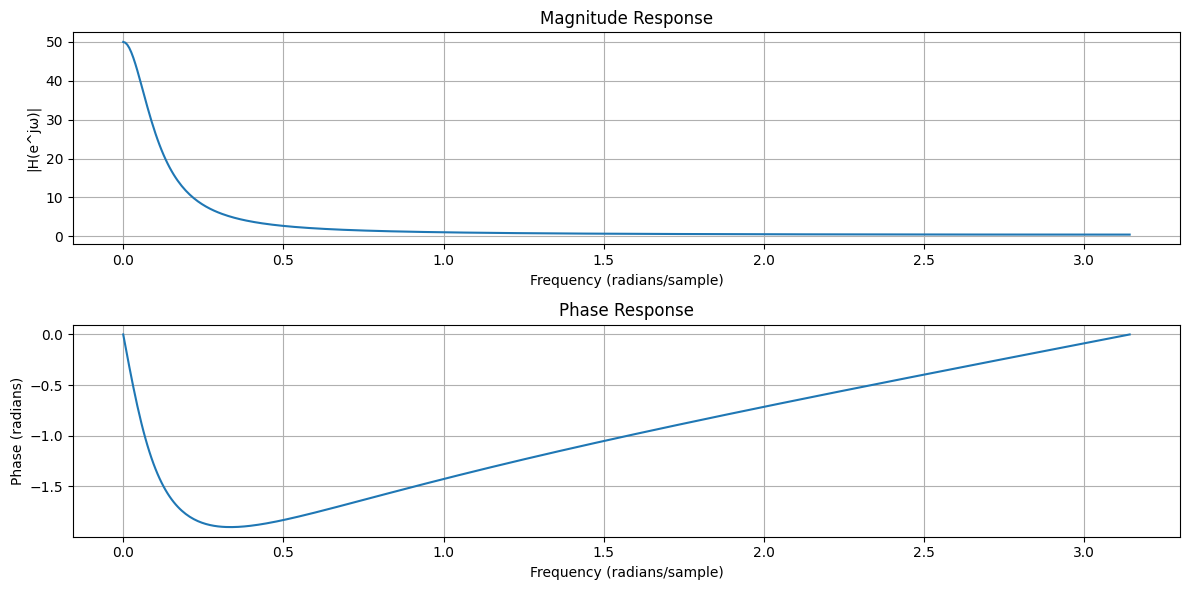

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Koefisien numerator dan denominator
b = [1, -0.5]         # Numerator coefficients
a = [1, -1.8, 0.81]   # Denominator coefficients

# Frekuensi sudut (dalam radian/sampel)
omega = np.linspace(0, np.pi, 500)  # Dari 0 hingga π (frekuensi normal)

# Frequency response
H = np.zeros_like(omega, dtype=complex)
for i, w in enumerate(omega):
    z = np.exp(1j * w)  # Unit circle
    numerator = sum(b[k] * z**(-k) for k in range(len(b)))
    denominator = sum(a[k] * z**(-k) for k in range(len(a)))
    H[i] = numerator / denominator

# Magnitude dan phase
magnitude = np.abs(H)
phase = np.angle(H)

# Plot hasil
plt.figure(figsize=(12, 6))

# Magnitude response
plt.subplot(2, 1, 1)
plt.plot(omega, magnitude)
plt.title("Magnitude Response")
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("|H(e^jω)|")
plt.grid()

# Phase response
plt.subplot(2, 1, 2)
plt.plot(omega, phase)
plt.title("Phase Response")
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()


<ipython-input-3-68f80823cf64>:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.real(poles), np.imag(poles), s=100, marker='x', label="Poles", edgecolor='k')


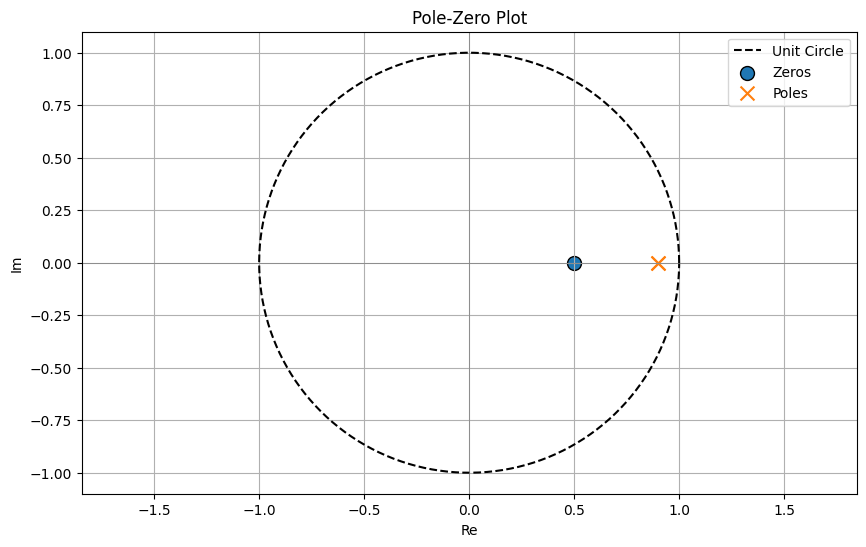

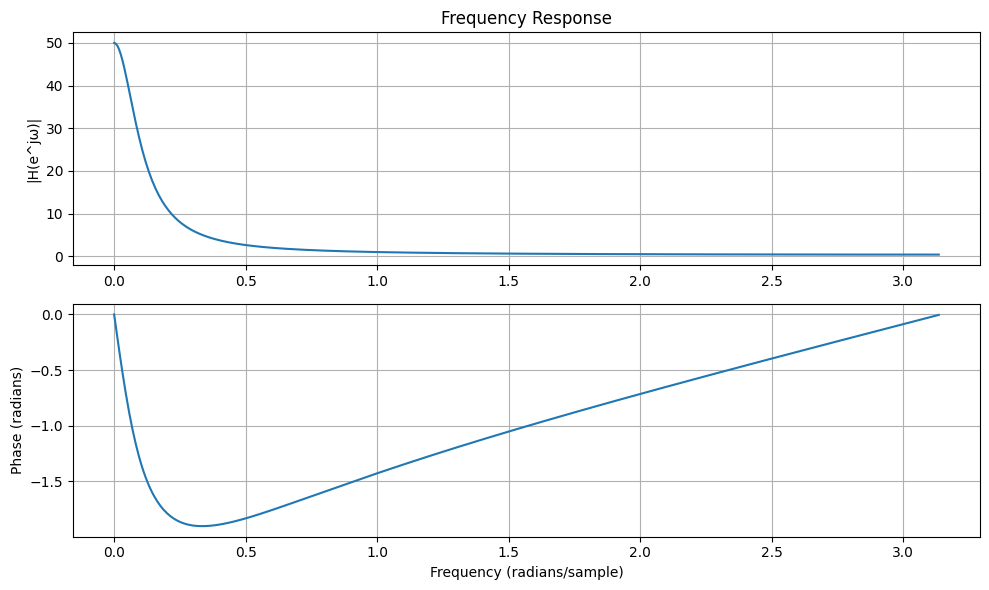

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk

# Definisi transfer function
b = [1, -0.5]         # Numerator coefficients
a = [1, -1.8, 0.81]   # Denominator coefficients

# Hitung zeros, poles, dan gain
zeros, poles, gain = tf2zpk(b, a)

# Plot z-plane
plt.figure(figsize=(10, 6))

# Unit circle
theta = np.linspace(0, 2 * np.pi, 500)
unit_circle = np.exp(1j * theta)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', label="Unit Circle")

# Plot zeros dan poles
plt.scatter(np.real(zeros), np.imag(zeros), s=100, marker='o', label="Zeros", edgecolor='k')
plt.scatter(np.real(poles), np.imag(poles), s=100, marker='x', label="Poles", edgecolor='k')

plt.title("Pole-Zero Plot")
plt.xlabel("Re")
plt.ylabel("Im")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

# Plot frequency response
w, h = freqz(b, a, worN=500)
plt.figure(figsize=(10, 6))

# Magnitude response
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h))
plt.title("Frequency Response")
plt.ylabel("|H(e^jω)|")
plt.grid()

# Phase response
plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h))
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()


# 3. Phase Delay and Group Delay

# Task
$
H(e^{j\omega}) = \left\{ \begin{array}{ l l }
    \left| H(e^{j0.1}) \right| \sim 1 \\
    \left| H(e^{j0.4}) \right| \sim 0 \\
  \end{array} \right.
$

